# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.describe()

id         carat         depth         table         price  \
count  53939.000000  53939.000000  53939.000000  53939.000000  53939.000000   
mean   26970.553811      0.797917     61.749458     57.457192   3932.646267   
std    15571.420425      0.473987      1.432582      2.234510   3989.317520   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.500000      0.400000     61.000000     56.000000    950.000000   
50%    26971.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.500000      1.040000     62.500000     59.000000   5324.000000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z   clarity_num     color_num  
count  53931.000000  53932.000000  53932.000000  53939.000000  53939.000000  
mean       5.731964      5.733907      3.539623      3.051058      3.405829  
std        1.119634      1.111750      0.691807      1.647128      1.701110  
min        3.730000      3.680000      1.070000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000      2.000000      2.000000  
50%        5.700000      5.710000      3.530000      3.000000      3.000000  
75%        6.540000      6.540000      4.040000      4.000000      5.000000  
max       10.740000     11.420000      6.980000      7.000000      6.000000


the biggest variability is in the price

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

I think the carats and the dimension

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [4]:
#your code here
diamonds.groupby(['color_num', 'color']).agg({'price':'mean',
                                             'carat':'mean',
                                             'table':'mean',
                                             'depth':'mean',
                                             'x':'mean',
                                             'y':'mean',
                                             'z':'mean'}).round(2).sort_values('price', ascending=False).reset_index()

color_num color    price  carat  table  depth     x     y     z
0          0     J  5323.82   1.16  57.81  61.89  6.52  6.52  4.03
1          1     I  5091.87   1.03  57.58  61.85  6.22  6.22  3.85
2          2     H  4485.74   0.91  57.52  61.84  5.98  5.98  3.70
3          3     G  3999.14   0.77  57.29  61.76  5.68  5.68  3.51
4          4     F  3724.89   0.74  57.43  61.69  5.62  5.62  3.47
5          6     D  3169.95   0.66  57.40  61.70  5.42  5.42  3.34
6          5     E  3076.75   0.66  57.49  61.66  5.41  5.42  3.34

**What do you see? Pay special attention to the relationship between price and color.**

color is directly correlated to the price (except D/E)

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

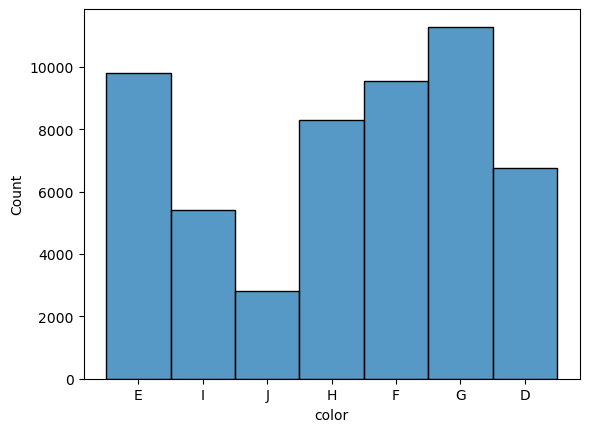

In [5]:
#your code here

import seaborn as sns

sns.histplot(data=diamonds, x='color')

plt.show()

#your comments here
G, E, F are the most frequent colors

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [6]:
#your code here
diamonds.groupby(['carat']).agg({'price':'mean',
                                 'table':'mean',
                                 'depth':'mean',
                                 'x':'mean',
                                 'y':'mean',
                                 'z':'mean'}).round(2).sort_values('price', ascending=False).reset_index()

carat     price  table  depth      x      y     z
0     3.51  18701.00  59.00  62.50   9.66   9.63  6.03
1     2.67  18686.00  58.00  63.80   8.69   8.64  5.54
2     4.50  18531.00  58.00  65.80  10.23  10.16  6.72
3     5.01  18018.00  59.00  65.50  10.74  10.54  6.98
4     2.57  17841.67  58.67  61.07   8.86   8.77  5.38
..     ...       ...    ...    ...    ...    ...   ...
268   0.24    505.19  57.49  61.60   3.99   4.02  2.47
269   0.23    486.14  58.03  61.43   3.95   3.97  2.43
270   0.22    391.40  60.40  61.62   3.90   3.85  2.39
271   0.21    380.22  58.44  60.51   3.87   3.84  2.33
272   0.20    365.17  59.33  61.10   3.79   3.75  2.30

[273 rows x 7 columns]


There is clearly a direct correlation between carat and price, but for high carats also other parameters
play in the price composition


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

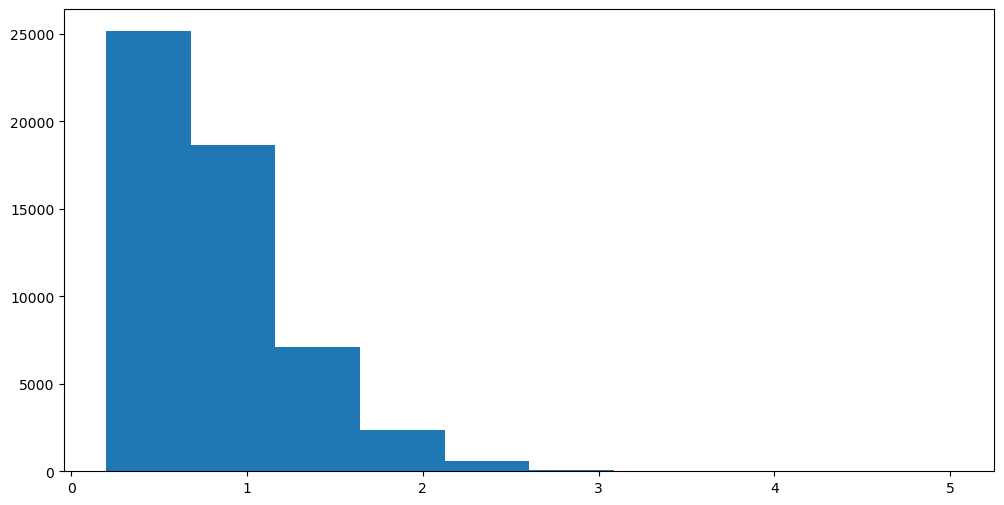

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(diamonds.carat, bins=10)

plt.show()

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [8]:
#your code here
diamonds.groupby(['table']).agg({'price':'mean',
                                 'carat':'mean',
                                 'depth':'mean',
                                 'x':'mean',
                                 'y':'mean',
                                 'z':'mean'}).round(2).sort_values('price', ascending=False).reset_index()

table     price  carat  depth     x     y     z
0     95.0  13387.00   2.01  58.60  8.32  8.31  4.87
1     51.6  13203.00   2.00  61.00  8.14  8.18  4.97
2     50.0   8995.50   1.51  61.50  7.38  7.30  4.51
3     58.5   6499.70   1.08  61.94  6.24  6.31  3.88
4     69.0   6272.22   1.17  57.64  6.80  6.68  3.89
..     ...       ...    ...    ...   ...   ...   ...
122   61.8   1262.00   0.45  60.10  4.96  4.98  2.99
123   53.1   1146.67   0.40  62.57  4.68  4.70  2.94
124   61.3    929.00   0.40  62.00  4.69  4.72  2.91
125   52.8    652.50   0.30  62.35  4.28  4.33  2.69
126   44.0    474.00   0.29  62.80  4.20  4.24  2.65

[127 rows x 7 columns]

#your comments here
also there seems to be a direct correlation between table and price

**Finally, do the same with the `clarity` column.**

In [9]:
#your code here
diamonds.groupby(['clarity_num','clarity']).agg({'price':'mean',
                                 'carat':'mean',
                                 'table':'mean',
                                 'depth':'mean',
                                 'x':'mean',
                                 'y':'mean',
                                 'z':'mean'}).round(2).sort_values('price', ascending=False).reset_index()

clarity_num clarity    price  carat  table  depth     x     y     z
0            1     SI2  5062.25   1.08  57.93  61.77  6.40  6.39  3.95
1            2     SI1  3996.00   0.85  57.66  61.85  5.89  5.89  3.64
2            3     VS2  3924.99   0.76  57.42  61.72  5.66  5.66  3.49
3            0      I1  3924.17   1.28  58.30  62.73  6.76  6.71  4.22
4            4     VS1  3839.46   0.73  57.32  61.67  5.57  5.58  3.44
5            5    VVS2  3283.74   0.60  57.02  61.66  5.22  5.23  3.22
6            7      IF  2864.84   0.51  56.51  61.51  4.97  4.99  3.06
7            6    VVS1  2523.11   0.50  56.88  61.62  4.96  4.98  3.06

In [10]:
#your comments here

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [11]:
#your thoughts here

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


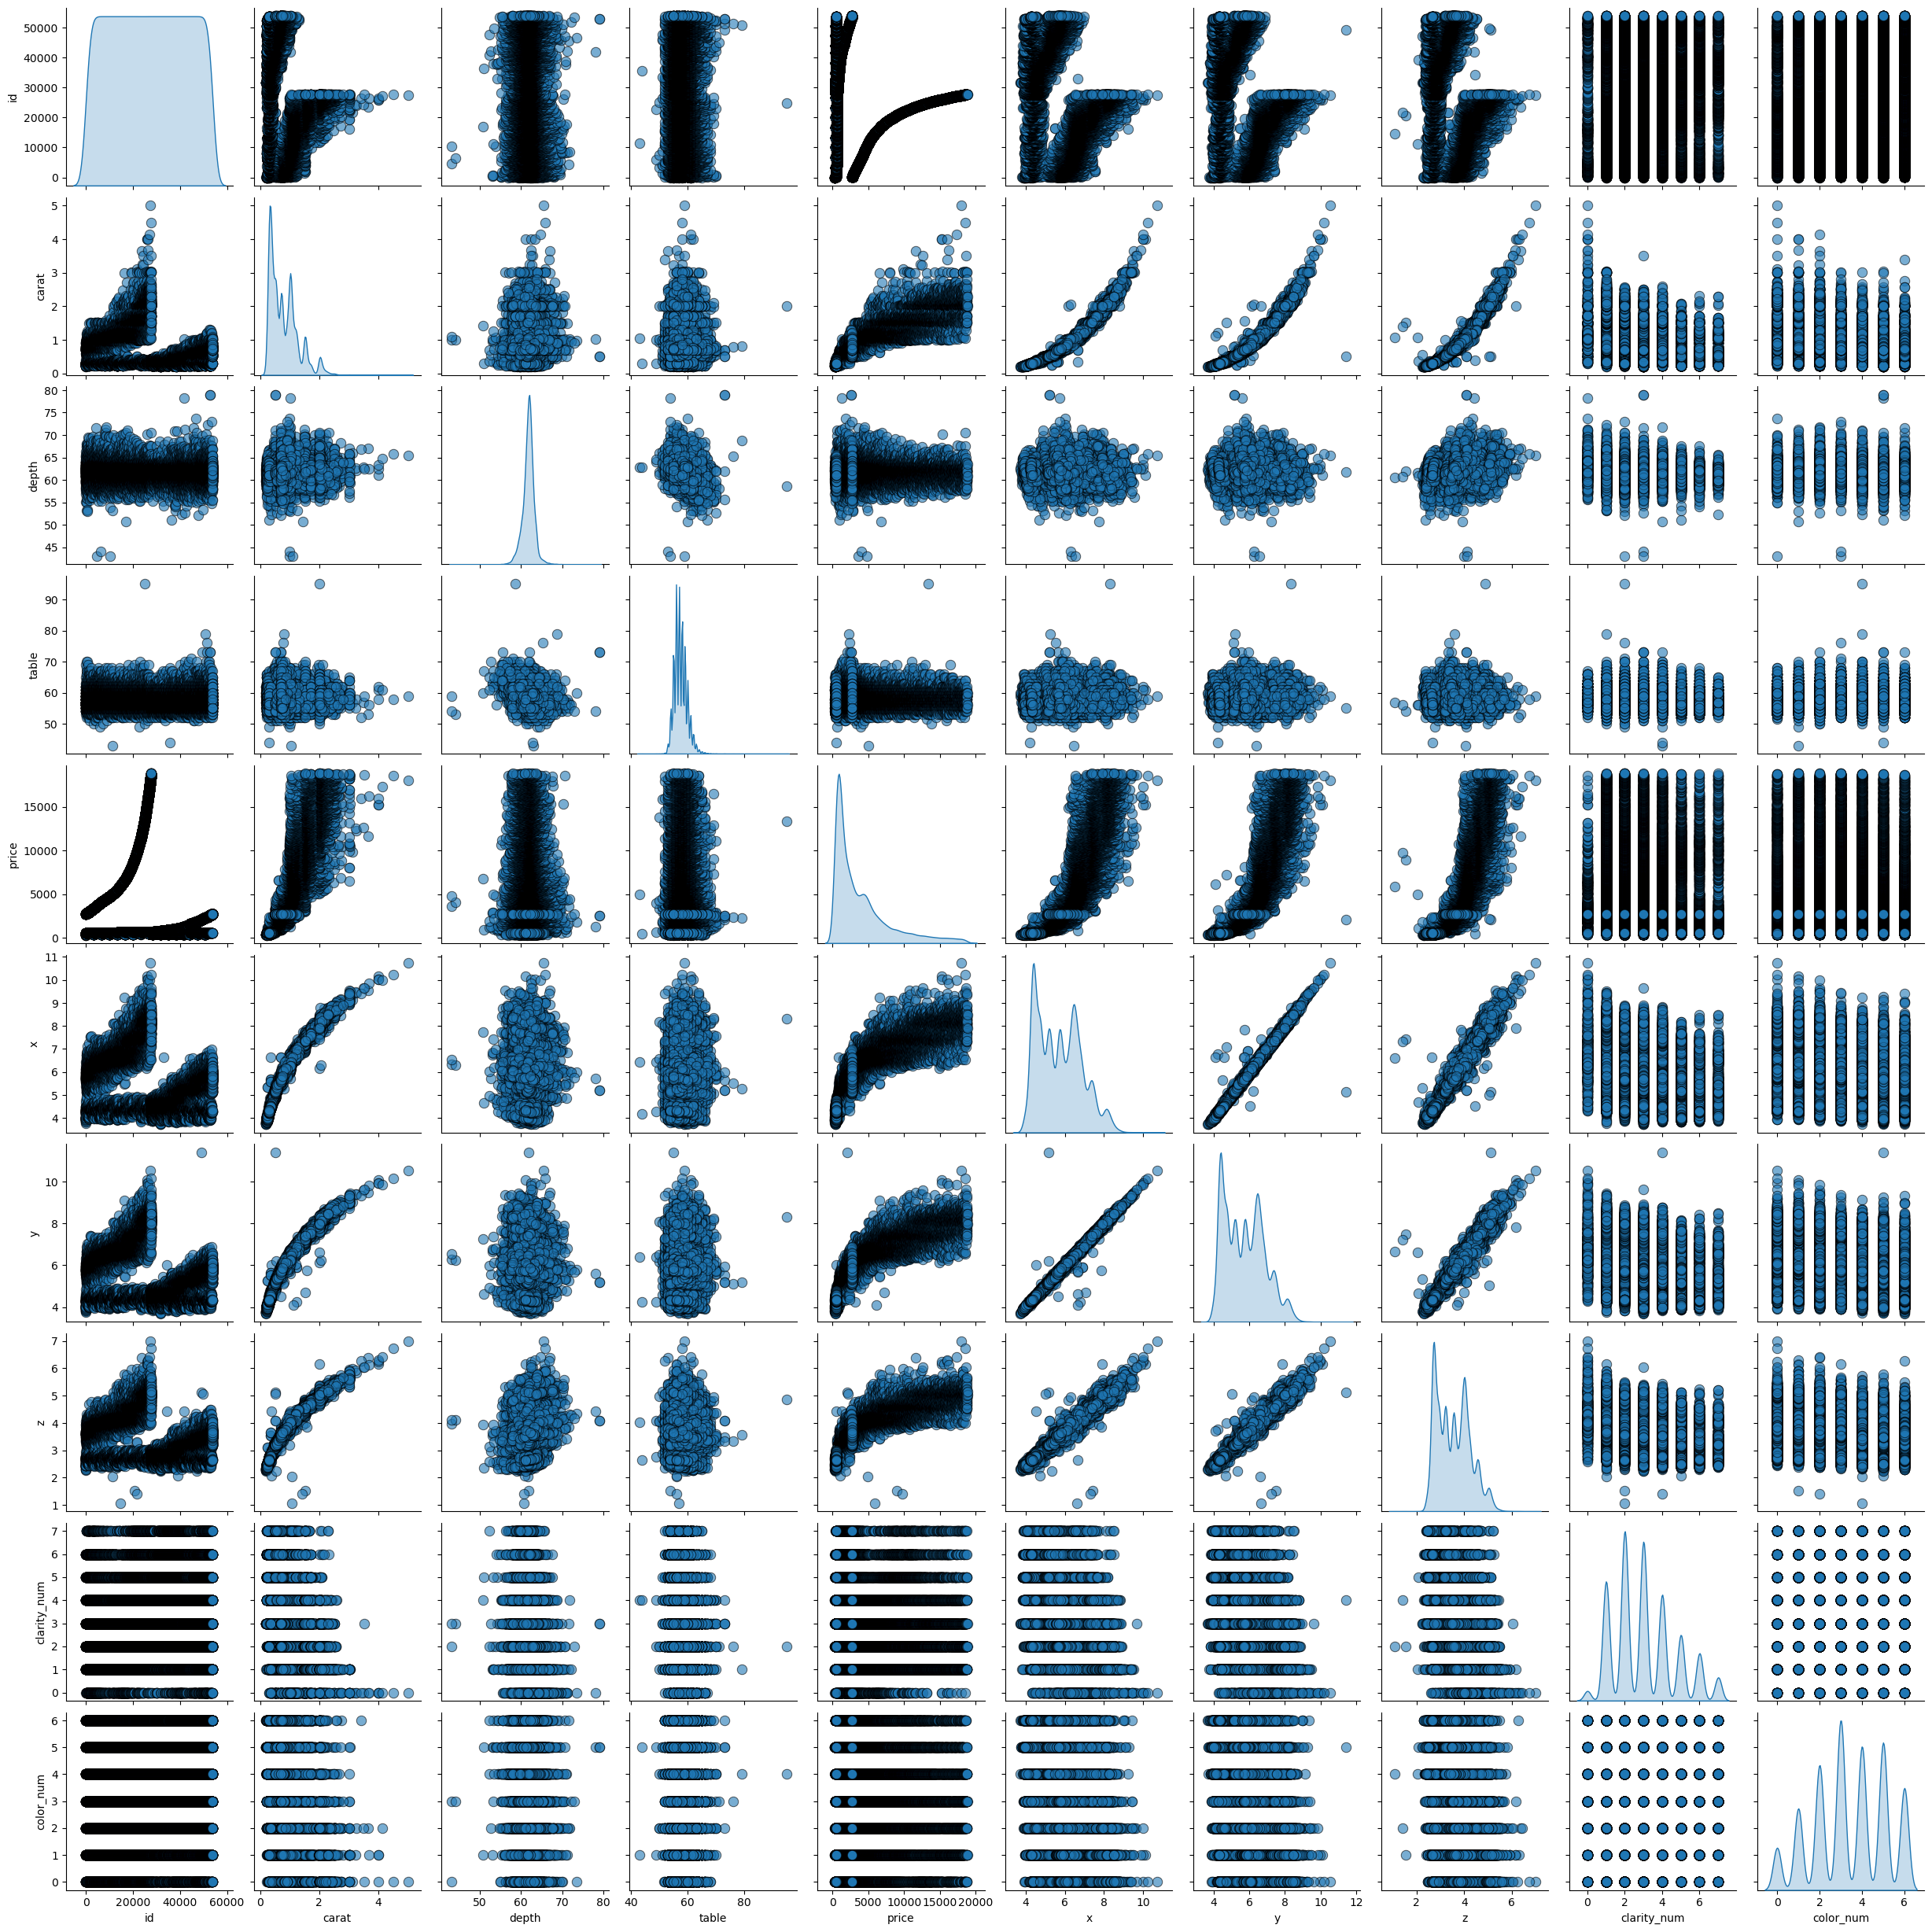

In [12]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

/tmp/ipykernel_120080/2255422997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diamonds.corr().round(2), annot=True)


<Axes: >

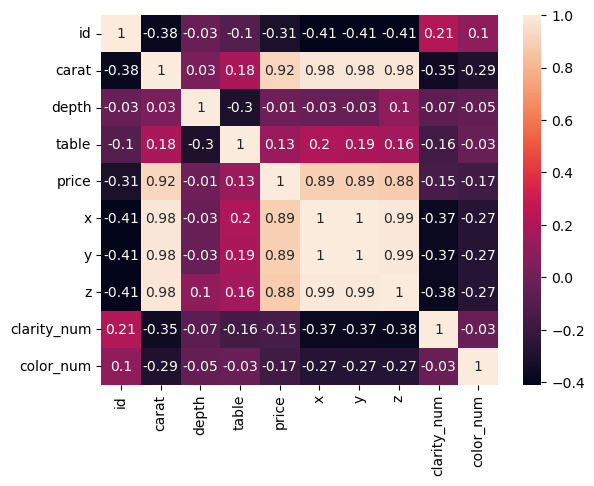

In [21]:
#your thoughts here
sns.heatmap(diamonds.corr().round(2), annot=True)

- strong correlation between dimension and price
- strong correlation between carat and price
- weak correlation between clarity and carat and color and carat

**What do you see here? Regarding the results before, does it fit with them?**

yes

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

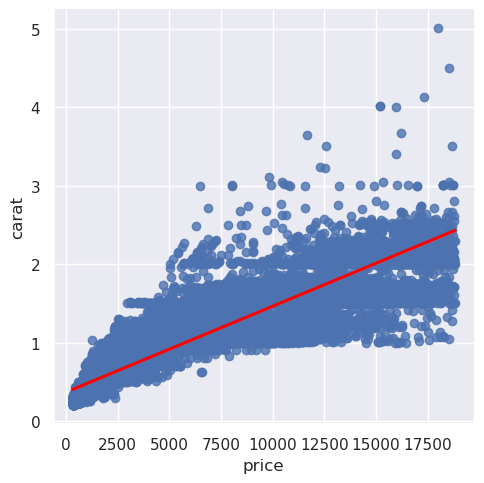

In [33]:
# your code here

sns.lmplot(data=diamonds, x='price', y='carat', line_kws={'color': 'red'})
plt.show()

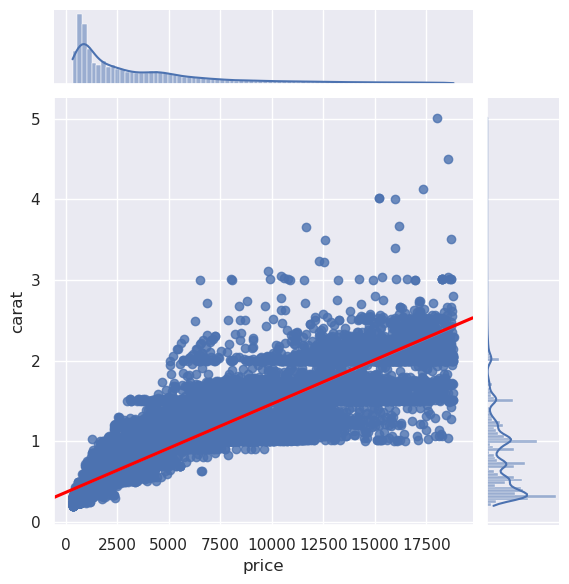

In [34]:
diamonds = sns.load_dataset("diamonds")
sns.jointplot(x="price", y="carat", data=diamonds,
                  kind="reg", truncate=False, line_kws={'color': 'red'})


plt.show()

**What do you think?**

In [ ]:
#your thoughts here

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.